In [1]:
def read_stored_minors(max_n, min_edge_count):
    """
    INPUT: max_n, the maximum number of vertices of previously processed graphs
           min_edge_count, the number of edges of graphs on max_n vertices of previously processed graphs
    OUTPUT: uspcm_list, minimals_list: the previously computed uscpm_list and minimals_list
    """
    import requests
    import ast
    
    repo_url = 'https://raw.githubusercontent.com/cerickson30/qBound/main'
    
    uspcm_list = []

#     with open(path_prefix + f'/uspcm_dict/full_uspcm_dict_after_n_{max_n}_edges-{min_edge_count}.txt', 'r') as infile:
#         stored_uspcm = infile.read()

#         uspcm_list.extend(ast.literal_eval(stored_uspcm))

    uspcm_file = f'uspcm_dict/full_uspcm_dict_after_n_{max_n}_edges-{min_edge_count}.txt'
    url = f'{repo_url}/minor_minimal_graphs/{uspcm_file}'
    
    content = requests.get(url).text
    uspcm_list.extend(ast.literal_eval(content))


    minimals_list = []

#     with open(path_prefix + f'/all_minimals/all_minimals_after_n_{max_n}_edges-{min_edge_count}.txt', 'r') as infile:
#         stored_minimals = infile.read()

#         minimals_list.extend(ast.literal_eval(stored_minimals))

    minimals_file = f'all_minimals/all_minimals_after_n_{max_n}_edges-{min_edge_count}.txt'
    url = f'{repo_url}/minor_minimal_graphs/{minimals_file}'
    
    content = requests.get(url).text
    minimals_list.extend(ast.literal_eval(content))
        
    return uspcm_list, minimals_list



def show_spectator_minor_floor(g, uspcm_list):
    """
    INPUT: g, a graph6_string; uspcm_list a previously computed uspcm_list
    OUTPUT: Displays the graph, graph6_string, and USPC_floor (also called spectator number minor floor of G)
    """
    for graph_list in uspcm_list:
        for k_dict in graph_list:
            if g in k_dict.keys():
                Graph(g).show()
                print(f'Graph6_string: {g},\tUSPC_Floor = {k_dict[g]}', end='\n\n')

                
                
                
def get_minor_minimal_graphs(max_n, spectator_number, ee=1, connected = False, exact_vertex_count = False):
    """
    INPUT: max_n, the maximum number of vertices of a graph
           ee, the minimum number of edges of a graph
           spectator_number, the spectator minor floor number of interest
           connected, whether to only display connected graphs
           exact_vertex_count, whether to show only graphs with |V(G)| = max_n
    Show the graphs on less than nn vertices with spectator minor floor = spectator_number
    Also shows graphs on nn vertices and at least ee edges with USPC_floor = spectator_number
    """
    
    prior_uspcm_list, prior_minimals_list = read_stored_minors(max_n, ee)
    
    count = 0
    
    if exact_vertex_count == False:

        for g in prior_minimals_list[spectator_number]:
            if connected == False:
                show_spectator_minor_floor(g, prior_uspcm_list)
            elif connected == True and Graph(g).is_connected():
                    show_spectator_minor_floor(g, prior_uspcm_list)
                
    elif exact_vertex_count == True:
        for g in prior_minimals_list[spectator_number]:
            if Graph(g).num_verts() == max_n:
                if connected == False:
                    show_spectator_minor_floor(g, prior_uspcm_list)
                elif connected == True and Graph(g).is_connected():
                        show_spectator_minor_floor(g, prior_uspcm_list)
    

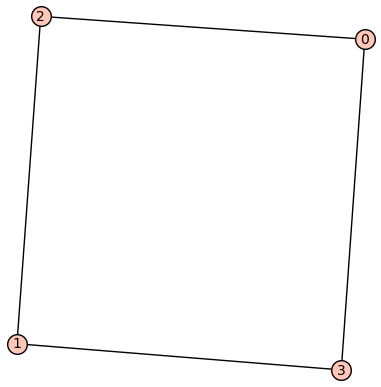

Graph6_string: C],	USPC_Floor = 2



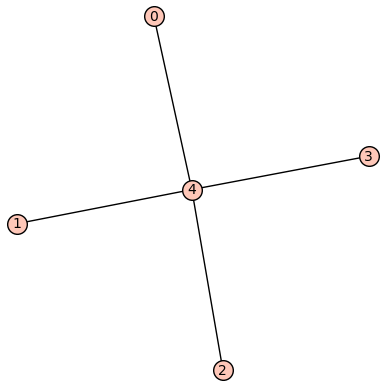

Graph6_string: D?{,	USPC_Floor = 2



In [2]:
get_minor_minimal_graphs(max_n=5, spectator_number=2, connected=True)

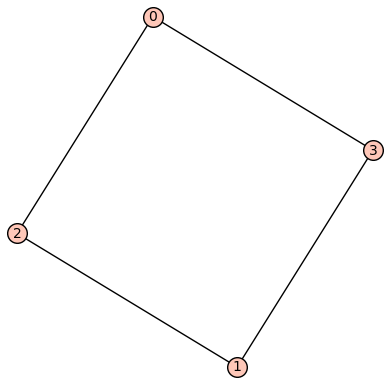

Graph6_string: C],	USPC_Floor = 2



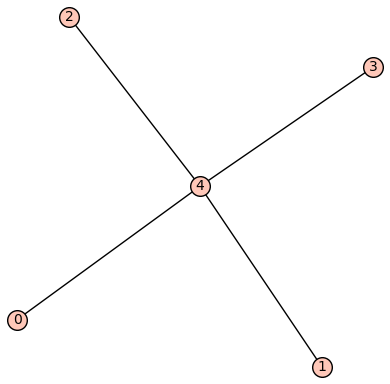

Graph6_string: D?{,	USPC_Floor = 2



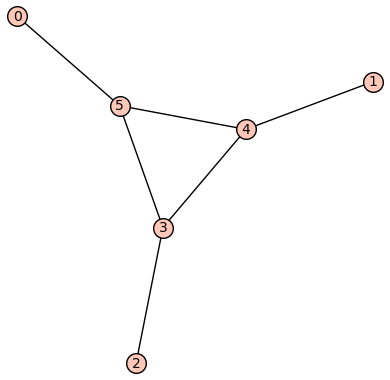

Graph6_string: E@UW,	USPC_Floor = 2



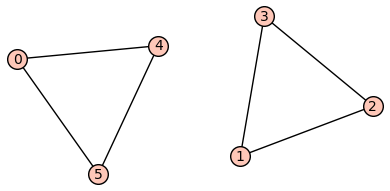

Graph6_string: EJaG,	USPC_Floor = 2



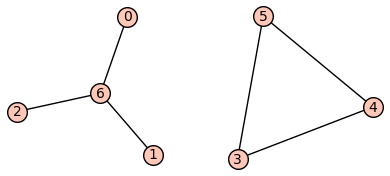

Graph6_string: F?C^?,	USPC_Floor = 2



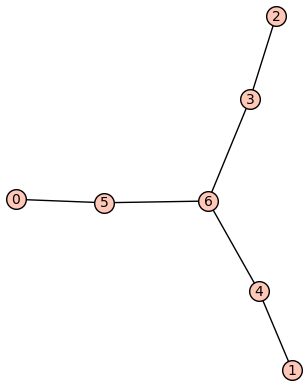

Graph6_string: F@Q?w,	USPC_Floor = 2



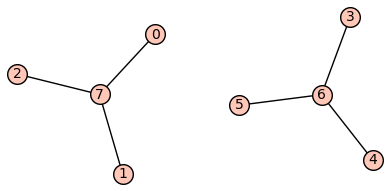

Graph6_string: G???~?,	USPC_Floor = 2



In [3]:
get_minor_minimal_graphs(max_n=8, spectator_number=2, connected=False)

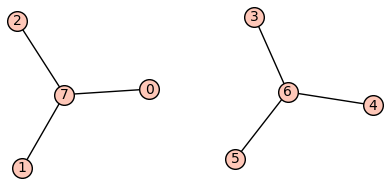

Graph6_string: G???~?,	USPC_Floor = 2



In [4]:
get_minor_minimal_graphs(max_n=8, spectator_number=2, connected=False, exact_vertex_count=True)

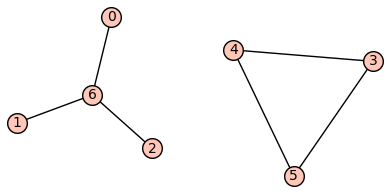

Graph6_string: F?C^?,	USPC_Floor = 2



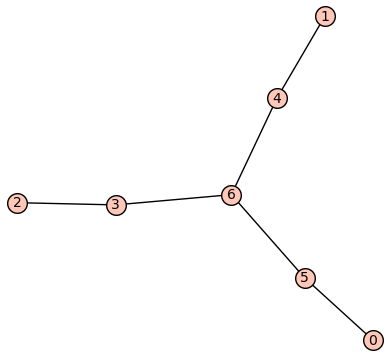

Graph6_string: F@Q?w,	USPC_Floor = 2



In [5]:
get_minor_minimal_graphs(max_n=7, spectator_number=2, connected=False, exact_vertex_count=True)

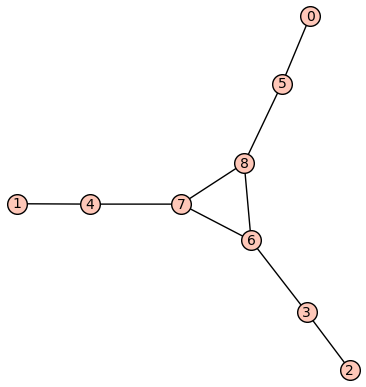

Graph6_string: H@Q?_SF,	USPC_Floor = 3



In [6]:
get_minor_minimal_graphs(max_n=9, spectator_number=3, connected=True, exact_vertex_count=True)

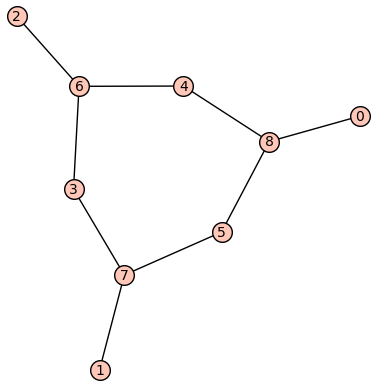

Graph6_string: H??@qiK,	USPC_Floor = 4



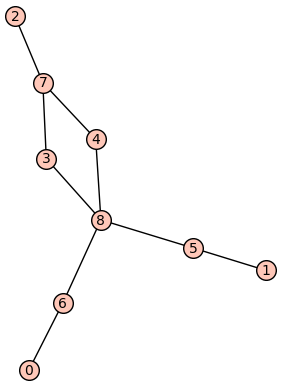

Graph6_string: H?@C@o],	USPC_Floor = 4



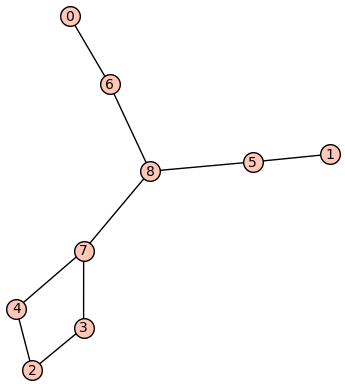

Graph6_string: H@HC?oF,	USPC_Floor = 4



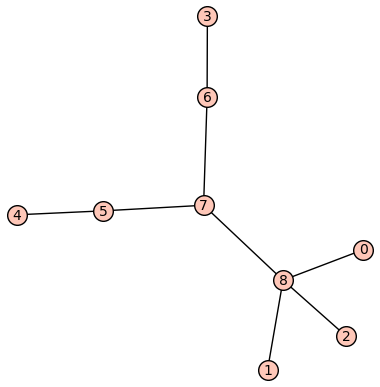

Graph6_string: H??G_N`,	USPC_Floor = 4



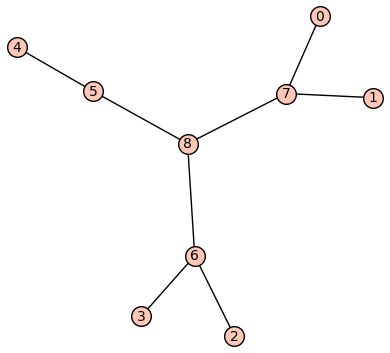

Graph6_string: H??He?F,	USPC_Floor = 4



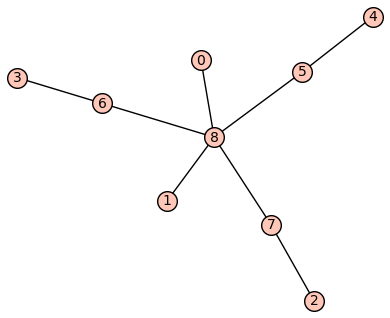

Graph6_string: H??G`BF,	USPC_Floor = 4



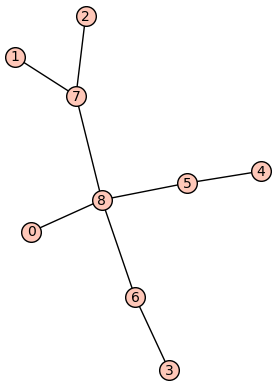

Graph6_string: H??GbAF,	USPC_Floor = 4



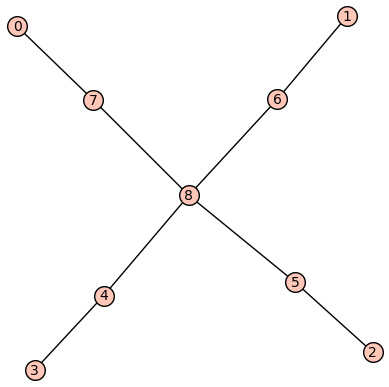

Graph6_string: H?CaC?N,	USPC_Floor = 4



In [7]:
get_minor_minimal_graphs(max_n=9, spectator_number=4, connected=True, exact_vertex_count=True)

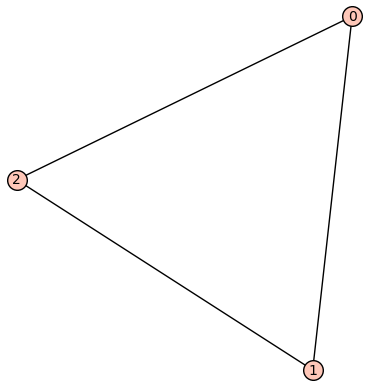

Graph6_string: Bw,	USPC_Floor = 1



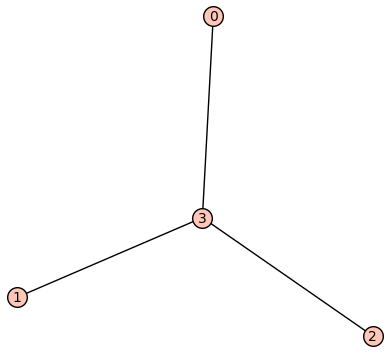

Graph6_string: CF,	USPC_Floor = 1



In [7]:
get_minor_minimal_graphs(max_n=9, spectator_number=1, connected=False)

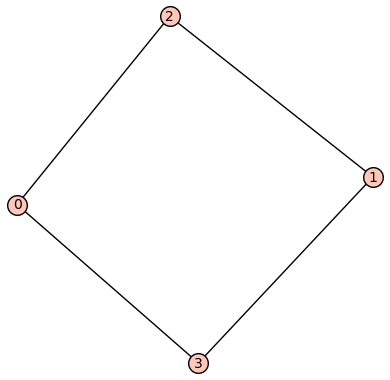

Graph6_string: C],	USPC_Floor = 2



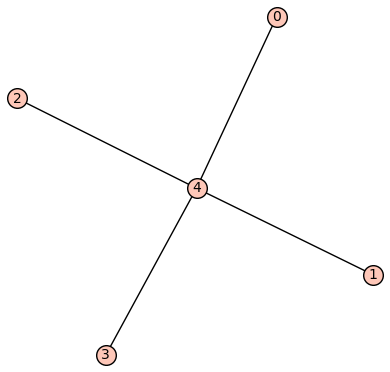

Graph6_string: D?{,	USPC_Floor = 2



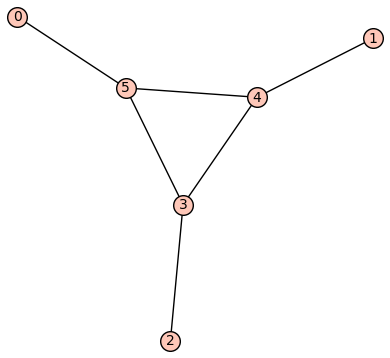

Graph6_string: E@UW,	USPC_Floor = 2



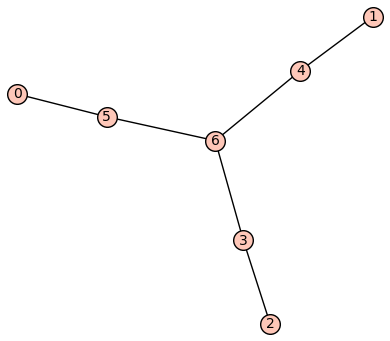

Graph6_string: F@Q?w,	USPC_Floor = 2



In [30]:
get_minor_minimal_graphs(max_n=9, spectator_number=2, connected=True)

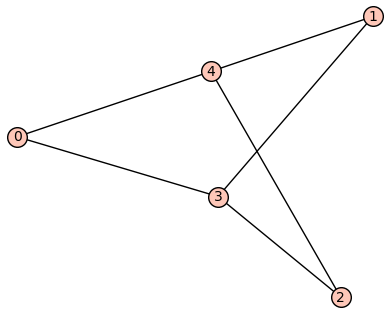

Graph6_string: DFw,	USPC_Floor = 3



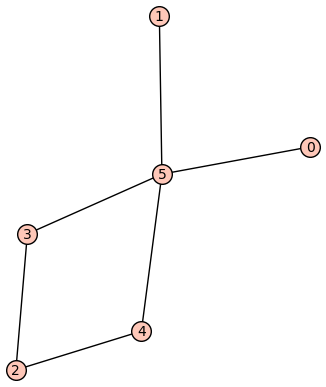

Graph6_string: E@JW,	USPC_Floor = 3



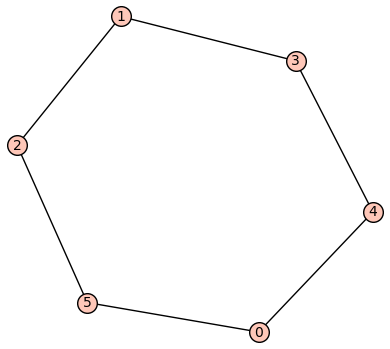

Graph6_string: EIe_,	USPC_Floor = 3



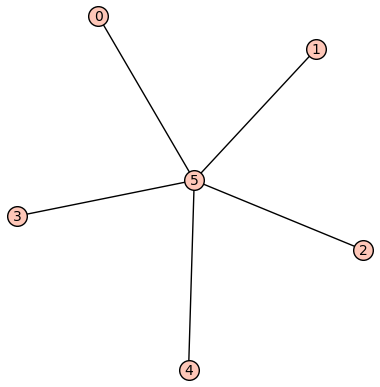

Graph6_string: E?Bw,	USPC_Floor = 3



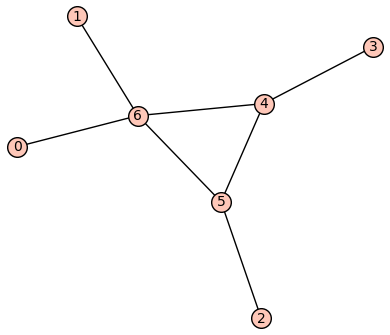

Graph6_string: F?CmW,	USPC_Floor = 3



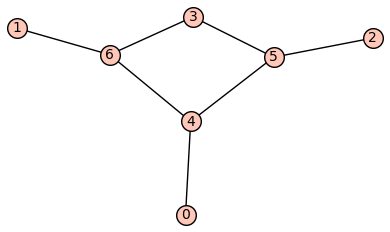

Graph6_string: F?_yo,	USPC_Floor = 3



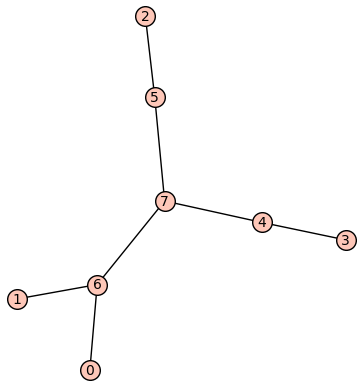

Graph6_string: G?Ce?[,	USPC_Floor = 3



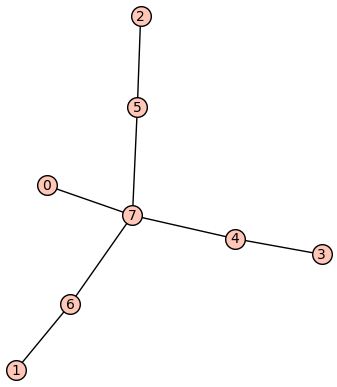

Graph6_string: G?CaC[,	USPC_Floor = 3



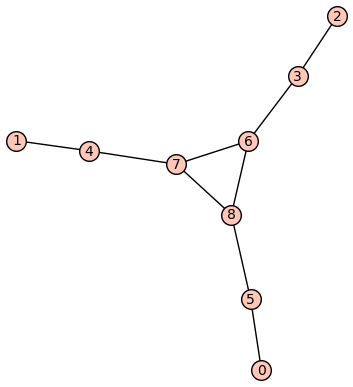

Graph6_string: H@Q?_SF,	USPC_Floor = 3



In [11]:
get_minor_minimal_graphs(max_n=9, spectator_number=3, connected=True)

# Conjecture: For a minor minimal graph G, with spectator floor k, num_edges <= 3*k

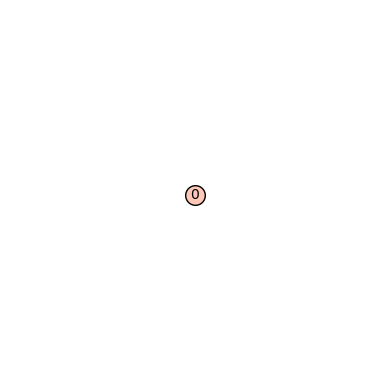

Graph6_string: @,	Spectator floor: 0,	Number of edges = 0



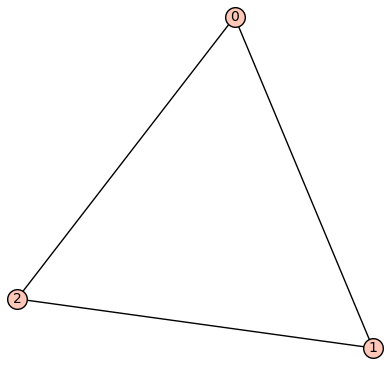

Graph6_string: Bw,	Spectator floor: 1,	Number of edges = 3



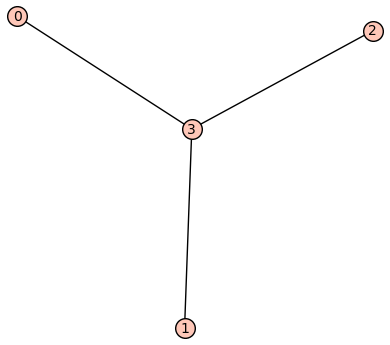

Graph6_string: CF,	Spectator floor: 1,	Number of edges = 3



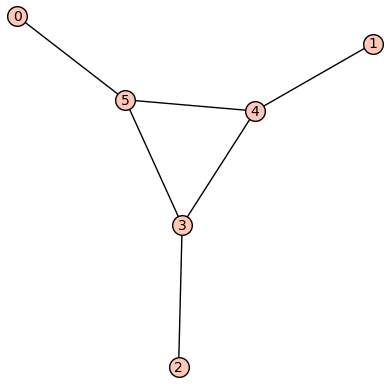

Graph6_string: E@UW,	Spectator floor: 2,	Number of edges = 6



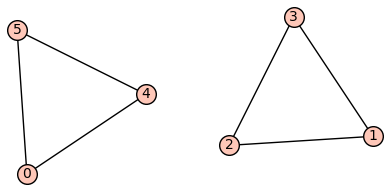

Graph6_string: EJaG,	Spectator floor: 2,	Number of edges = 6



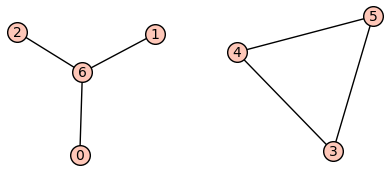

Graph6_string: F?C^?,	Spectator floor: 2,	Number of edges = 6



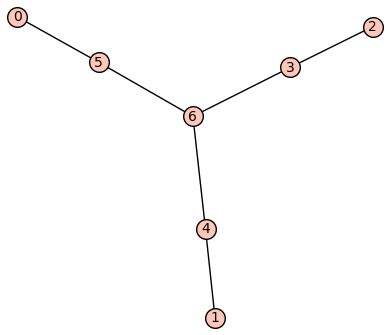

Graph6_string: F@Q?w,	Spectator floor: 2,	Number of edges = 6



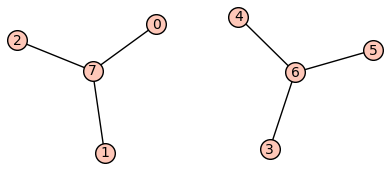

Graph6_string: G???~?,	Spectator floor: 2,	Number of edges = 6



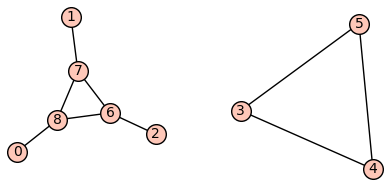

Graph6_string: H?CXAEB,	Spectator floor: 3,	Number of edges = 9



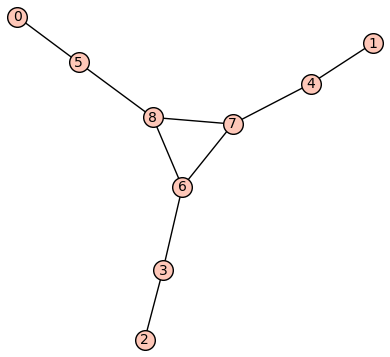

Graph6_string: H@Q?_SF,	Spectator floor: 3,	Number of edges = 9



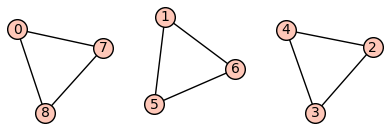

Graph6_string: H@LAKA@,	Spectator floor: 3,	Number of edges = 9



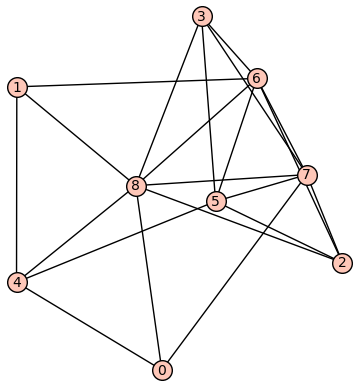

Graph6_string: H?ozlnz,	Spectator floor: 7,	Number of edges = 21



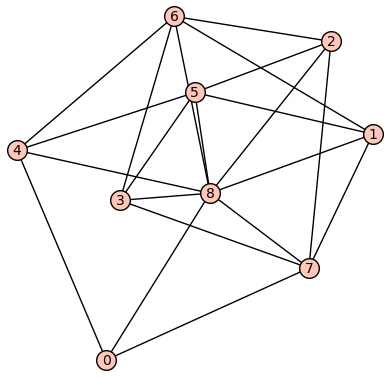

Graph6_string: H?`zvb~,	Spectator floor: 7,	Number of edges = 21



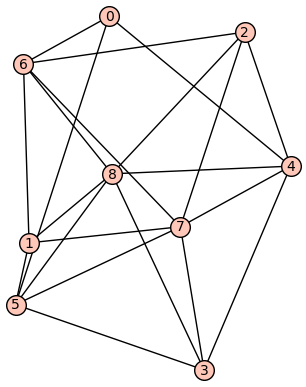

Graph6_string: H?nVB|},	Spectator floor: 7,	Number of edges = 21



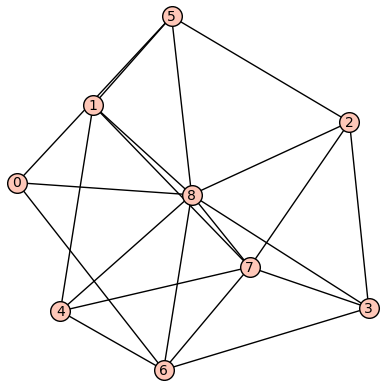

Graph6_string: H@Rcrv~,	Spectator floor: 7,	Number of edges = 21



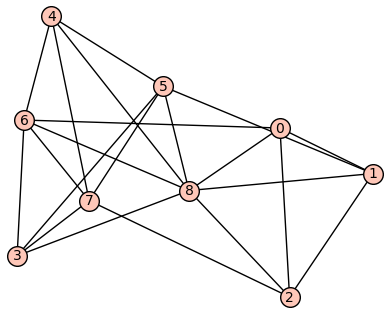

Graph6_string: Hw@[p~},	Spectator floor: 7,	Number of edges = 21



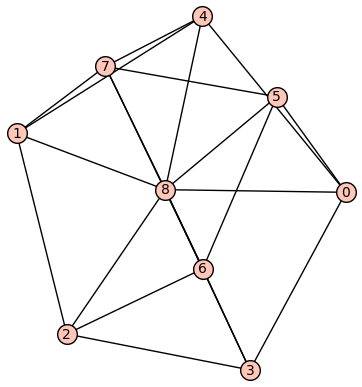

Graph6_string: HLq@i^~,	Spectator floor: 7,	Number of edges = 21



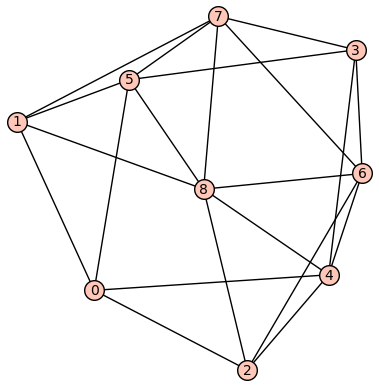

Graph6_string: HonPqln,	Spectator floor: 7,	Number of edges = 21

All done! Checked 463 minor minimal graphs.
There are 18 minor minimal graphs for which the num_edges == 3*k (where k is the spectator floor).


In [33]:
prior_uspcm_list, prior_minimals_list = read_stored_minors(9, 1)

count = 0
eq_count = 0
for kk in range(len(prior_minimals_list)):
    for g in prior_minimals_list[kk]:
        count += 1
#         print(f'Number of edges: {Graph(g).num_edges()},\tSpectator floor: {kk}')
        if Graph(g).num_edges() == 3*kk:
            Graph(g).show()
            print(f'Graph6_string: {g},\tSpectator floor: {kk},\tNumber of edges = {Graph(g).num_edges()}', end='\n\n')
            eq_count += 1
        elif Graph(g).num_edges() > 3*kk:
            print('\n\nEXCEPTION: VIOLATES CONJECTURE!!')
            Graph(g).show()
            print(f'Graph6_string: {g},\tSpectator floor: {kk},\tNumber of edges = {Graph(g).num_edges()}')
            print('\nEXCEPTION: VIOLATES CONJECTURE!!', end='\n\n')
print(f'All done! Checked {count} minor minimal graphs.')
print(f'There are {eq_count} minor minimal graphs for which the num_edges == 3*k (where k is the spectator floor).')